# The Clinton Foundation:  Donations & Arms Deals

In [316]:
import pandas as pd
from matplotlib import cm, pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics, linear_model
from sklearn.cross_validation import cross_val_score
import pylab
from mpl_toolkits.mplot3d import Axes3D

% matplotlib inline

In [317]:
df = pd.read_csv('../Clinton_Foundation/assets/clintonfoundation.csv')

In [318]:
df.columns = ['country', 'donation', 'weapons1', 'weapons2', 'perc']

In [320]:
region_color = []
df['arab'] = [0]*len(df)
for i in range(len(df['country'])):
    if df['country'][i] in ['Algeria', 'Bahrain', 'Brunei', 'Kuwait', 'Oman', \
            'Qatar', 'Saudi Arabia', 'UAE', 'Morocco']:
        region_color.append('red')
        df['arab'][i] = 1
    elif df['country'][i] in ['Germany', 'Ireland', 'Italy', 'Netherlands', 'Norway', \
            'United Kingdom']:
        region_color.append('blue')
    elif df['country'][i] in ['Australia', 'Canada', 'Thailand', 'Taiwan', 'Jamaica']:
        region_color.append('purple')
        
df['region_color'] = region_color
del region_color
        
weapons_diff = []
for i in range(len(df)):
    diff = df['weapons2'][i] - df['weapons1'][i]
    weapons_diff.append(diff)
    
df['weapons_diff'] = weapons_diff
del weapons_diff

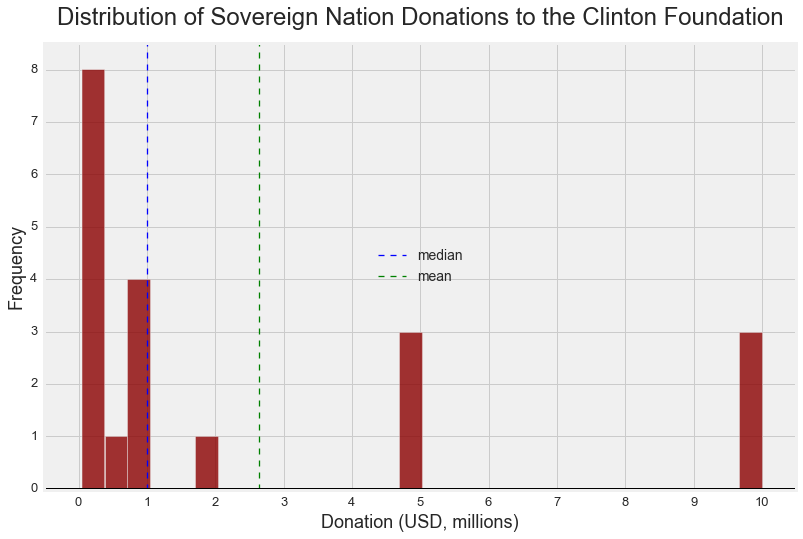

In [321]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_hist = plt.hist(df['donation']/10**6, color = 'darkred', bins = 30, alpha = 0.8)
plt.axvline((df['donation']/10**6).median(), color='b', linestyle='dashed', linewidth=1.3, \
            label = 'median')
plt.axvline((df['donation']/10**6).mean(), color='g', linestyle='dashed', linewidth=1.3, \
            label = 'mean')

plt.axhline(0, color='black', linewidth = 2)

plt.title('Distribution of Sovereign Nation Donations to the Clinton Foundation', \
          fontsize = 24, y = 1.03)

# y label
plt.xticks(np.arange(0, 11, 1), fontsize = 13)
plt.ylabel('Frequency', fontsize = 18)

# x label
plt.yticks(range(0, 9, 1), fontsize = 13)
plt.xlabel('Donation (USD, millions)', fontsize = 18)

plt.xlim([-0.5, 10.5])
plt.ylim([-0.02, 8.5])

plt.legend(loc='center', fontsize = 14)

plt.show()

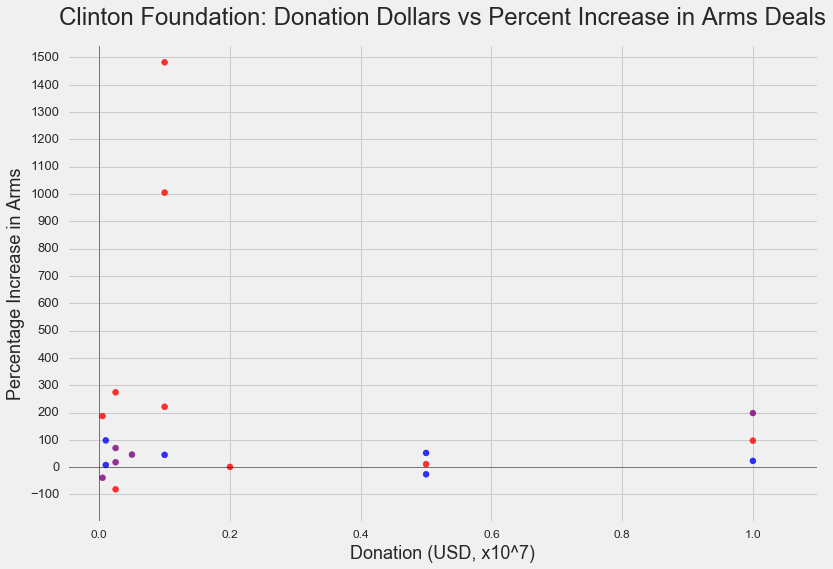

In [322]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(df['donation']/(10**7), df['perc'], s = 35, alpha = 0.8, \
            color = df['region_color'])

plt.axhline(0, color='black', alpha = 0.7, linewidth = 0.6)
plt.axvline(0, color='black', alpha = 0.7, linewidth = 0.6)

plt.title('Clinton Foundation: Donation Dollars vs Percent Increase in Arms Deals', \
          fontsize = 24, y = 1.03)

# y label
plt.ylabel('Percentage Increase in Arms', fontsize = 18)
plt.yticks(range(-100, 1600, 100), fontsize = 13)

# x label
plt.xlabel('Donation (USD, x10^7)', y = 0.1, fontsize = 18)
plt.xticks(np.arange(-0.2, 1.2, 0.2), fontsize = 12)

plt.xlim([-0.05, 1.1])
plt.ylim([-200, 1550])

plt.show()

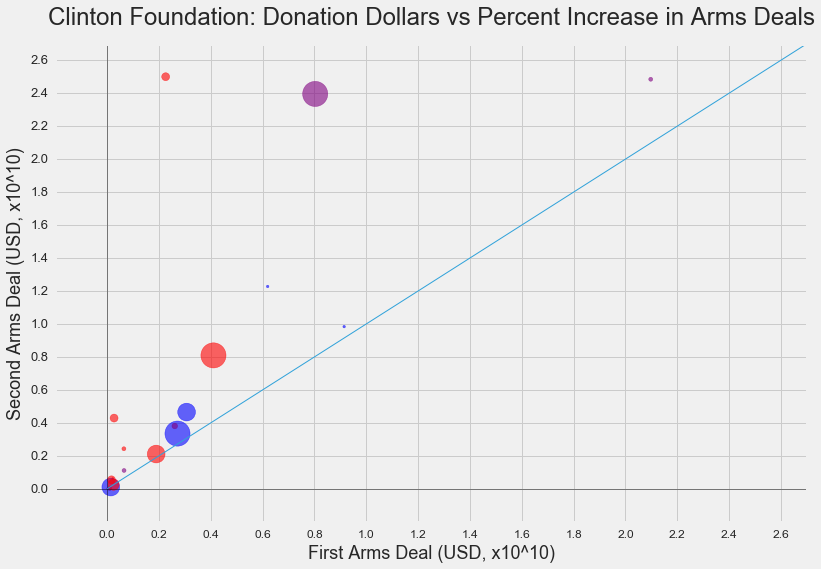

In [332]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(df['weapons1']/(10**10), df['weapons2']/(10**10), s = df['donation']/10**4.2, \
            alpha = 0.6, color = df['region_color'])

plt.axhline(0, color='black', alpha = 0.7, linewidth = 0.6)
plt.axvline(0, color='black', alpha = 0.7, linewidth = 0.6)

plt.title('Clinton Foundation: Donation Dollars vs Percent Increase in Arms Deals', \
          fontsize = 24, y = 1.03)

# y label
plt.ylabel('Second Arms Deal (USD, x10^10)', fontsize = 18)
plt.yticks(np.arange(-0.0, 2.7, 0.2), fontsize = 13)

# x label
plt.xlabel('First Arms Deal (USD, x10^10)', y = 0.1, fontsize = 18)
plt.xticks(np.arange(-0.0, 2.8, 0.2), fontsize = 12)

plt.xlim([-0.2, 2.7])
plt.ylim([-0.2, 2.7])

plt.plot([0,3], [0,3], linewidth = 1)

plt.show()

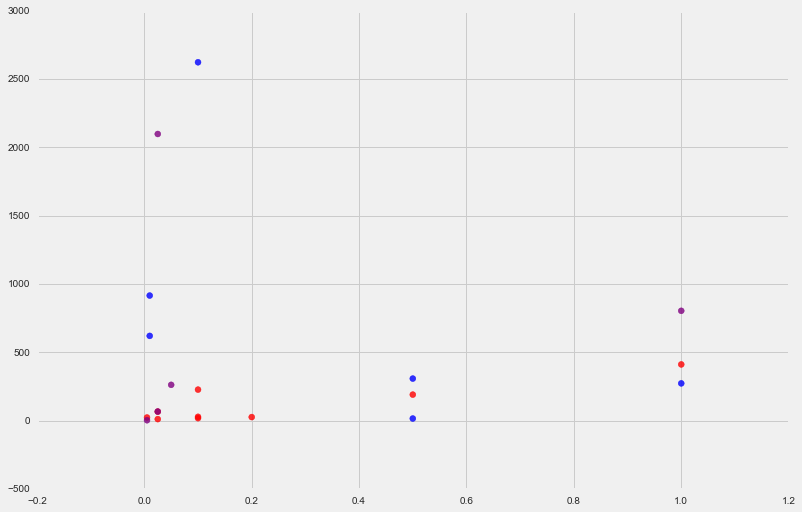

In [333]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(df['donation']/10**7, df['weapons1']/10**7, s = 35, alpha = 0.8, \
            color = df['region_color'])

# plt.axhline(0, color='black', alpha = 0.7, linewidth = 0.6)
# plt.axvline(0, color='black', alpha = 0.7, linewidth = 0.6)

# plt.title('Clinton Foundation: Donation Dollars vs Percent Increase in Arms Deals', \
#           fontsize = 24, y = 1.03)

# # y label
# plt.ylabel('Weapons Sale Difference (USDx10^7)', fontsize = 18)
# plt.yticks(np.arange(-0.5, 4.0, 0.5), fontsize = 13)

# # # x label
# plt.xlabel('Donation (USDx10^7)', y = 0.1, fontsize = 18)
# plt.xticks(np.arange(-0.5, 4.0, 0.5), fontsize = 13)

# plt.xlim([-0.05, 4])
# plt.ylim([-0.1, 4])

# plt.plot([0,5], [0,5], linewidth = 1)

plt.show()


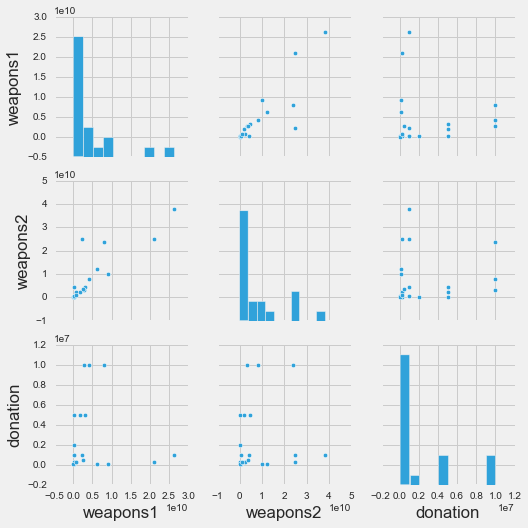

In [334]:
sns.pairplot(df[['weapons1', 'weapons2', 'donation']])

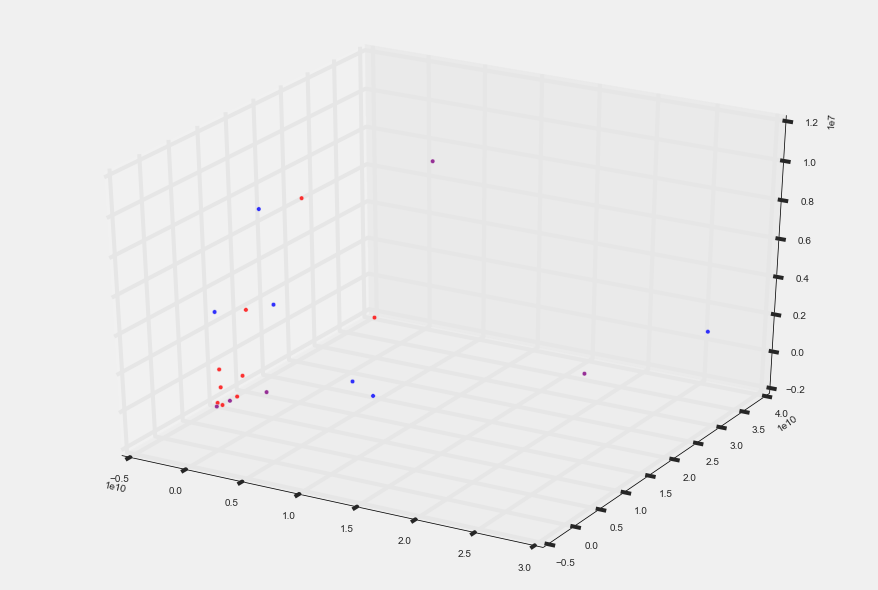

In [335]:
fig = pylab.figure(figsize = (12,8))
ax = Axes3D(fig)
ax.scatter(df['weapons1'], df['weapons2'], df['donation'], zdir='z', \
           c=df['region_color'], alpha=.8)

plt.show()

In [336]:
X = df[['donation', 'arab', 'weapons1']]
X_scaled = MinMaxScaler().fit_transform(X.astype(float))
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
y = df['weapons2']

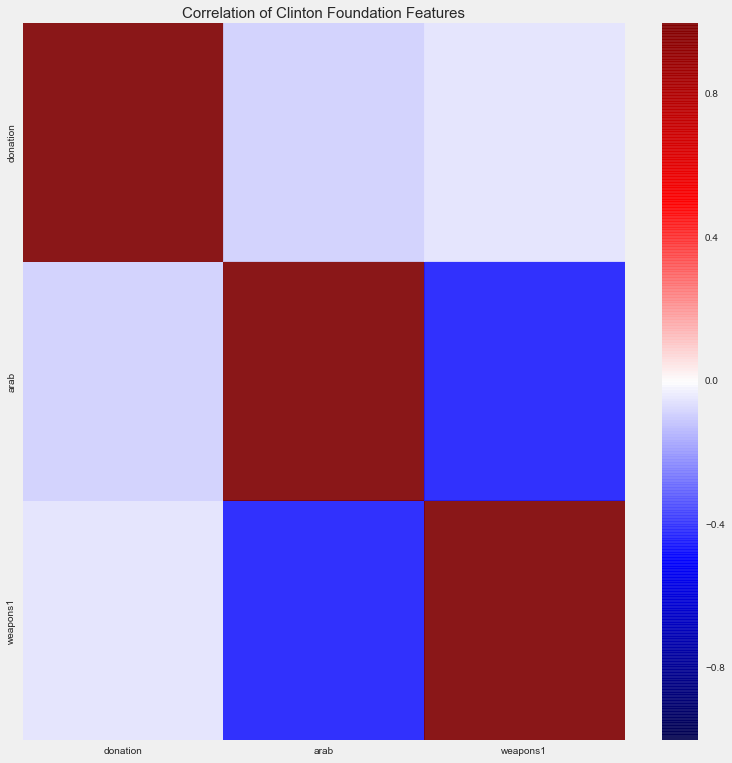

In [337]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.0)
ax = sns.heatmap(X_scaled.corr(), cmap = "seismic", alpha = 0.9)

ax.axes.set_title("Correlation of Clinton Foundation Features", size = 15)

plt.show()

In [340]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.25

In [341]:
# null error rate
y.mean()

8267723236.75

In [342]:
# examine coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,donation,"[-7.89706057803e-09, -7.01903380955e-07, 3.445..."
1,arab,"[-6.24968520474e-15, 9.685602877e-13, -4.00115..."
2,weapons1,"[-2.70391467175e-08, -8.79643211106e-09, -9.31..."


In [343]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [344]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print predicted

[4655490802 8094719012 9839619231 8094719012 3351140380 4655490802]


In [345]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print probs

[[  1.29017727e-008   1.12219771e-061   3.36698034e-007   1.26693242e-003
    1.88990469e-001   1.89154885e-002   1.14993364e-001   8.03813247e-002
    1.65940247e-004   2.98739465e-001   2.95500820e-001   5.99383605e-004
    4.46462639e-004   4.29833657e-013]
 [  2.02426235e-029   2.31672269e-207   5.00595446e-023   2.66773267e-019
    4.94019080e-002   1.51693990e-013   3.94565064e-002   5.55495823e-009
    8.05838125e-014   2.28619909e-001   6.82521671e-001   3.38169003e-032
    3.07912804e-033   6.33538238e-126]
 [  7.57652805e-087   0.00000000e+000   1.16091438e-072   1.83669445e-016
    1.34714989e-005   2.44700441e-005   9.29119942e-010   1.84045765e-001
    7.39678368e-041   2.60357105e-002   3.25386437e-003   6.04324712e-001
    1.82299584e-001   2.42218503e-006]
 [  7.54523748e-002   4.37133951e-002   7.73926288e-002   7.46684144e-002
    8.21369655e-002   7.65441872e-002   8.24264724e-002   7.84356581e-002
    7.92769705e-002   8.21949191e-002   8.25018372e-002   6.73161279e

In [346]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.0


ValueError: multiclass format is not supported

In [347]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]
             precision    recall  f1-score   support

   11360582       0.00      0.00      0.00         1
  253096156       0.00      0.00      0.00         1
 1113283489       0.00      0.00      0.00         1
 3351140380       0.00      0.00      0.00         0
 4655490802       0.00      0.00      0.00         0
 8094719012       0.00      0.00      0.00         0
 9839619231       0.00      0.00      0.00         0
23953849391       0.00      0.00      0.00         1
24998754760       0.00      0.00      0.00         1
38015933065       0.00      0.00      0.00         1

avg / total       0.00      0.00      0.00         6



In [348]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(model2, X_scaled, y, cv = 10)
print scores
print scores.mean()

/Users/Rebecca/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

('Coefficients: \n', array([  1.17154502e+00,   4.50653297e+08,   1.13951300e+01]))
Mean squared error: 111623951414104375296.00
Variance score: 0.50


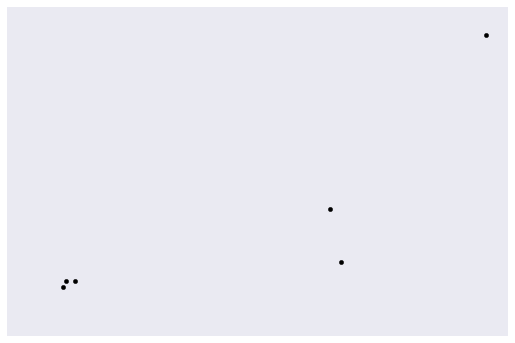

In [310]:

X = df[['weapons1', 'arab', 'donation']]
y = df['weapons2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
plt.scatter(y_test, regr.predict(X_test),  color='black')

plt.xticks(())
plt.yticks(())

plt.show()

In [248]:
min_val = float(df['weapons1'].min())
max_val = float(df['weapons1'].max())

def min_max(x):
    return (x-min_val)/(max_val-min_val)

new_col = df['weapons1'].apply(lambda y: min_max(y))
new_col

0     0.024092
1     0.305730
2     0.007675
3     0.003154
4     0.799682
5     0.348348
6     0.004822
7     0.235715
8     0.000000
9     0.071612
10    0.008833
11    0.116404
12    0.103014
13    0.005801
14    0.009645
15    0.155952
16    0.098970
17    0.024333
18    0.085597
19    1.000000
Name: weapons1, dtype: float64